In [ ]:
#!pip install tslearn
#!pip install sktime
#!pip install tsfresh
#!pip install awkward
#!pip install pyts
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt
from IPython.display import Audio 
from scipy.signal import decimate
import tslearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.optimizers import Adagrad
from tslearn.shapelets import LearningShapelets
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from pyts.transformation import ShapeletTransform

In [ ]:
X_train= np.load("RavdessAudioOnlyNumpy__X_train_compresso.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test_compresso.npy")
y_train= pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test= pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")

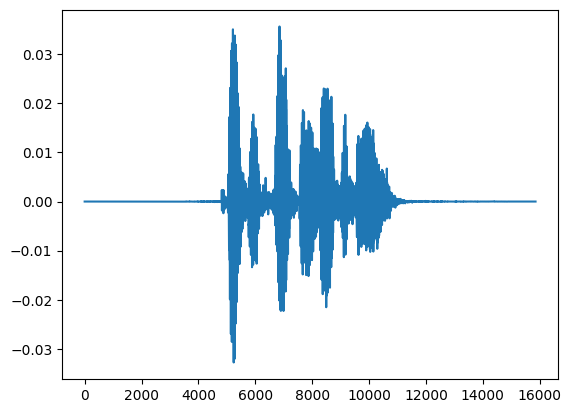

In [ ]:
plt.plot(X_train[0])

In [ ]:
start_index = 4000
end_index = 13000

selected_intervals = []
selected_intervals2 = []

for i in range(len(X_train)):
    selected_interval = X_train[i, start_index:end_index]
    selected_intervals.append(selected_interval)

selected_intervals = np.array(selected_intervals)

for i in range(len(X_test)):
    selected_interval2 = X_test[i, start_index:end_index]
    selected_intervals2.append(selected_interval2)

selected_intervals2 = np.array(selected_intervals2)

In [ ]:
X_train= selected_intervals
X_test= selected_intervals2

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

K-MEANS SUL DATASET NON APPROSSIMATO

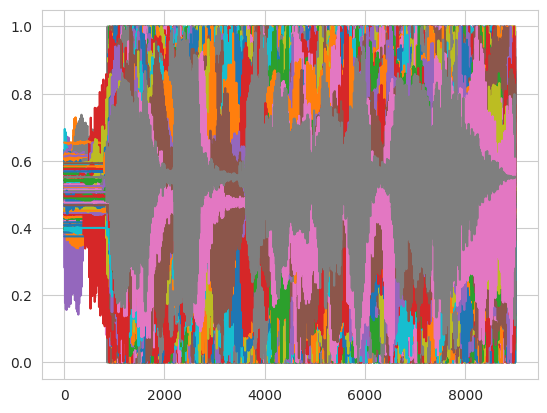

In [ ]:
plt.plot(np.squeeze(X_train).T)
plt.show() #tutte time series originali stampate insieme 

In [ ]:
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
km = TimeSeriesKMeans(n_clusters=8, metric="euclidean", 
                      max_iter=5, random_state=0)
km.fit(X_train)

TimeSeriesKMeans(max_iter=5, n_clusters=8, random_state=0)

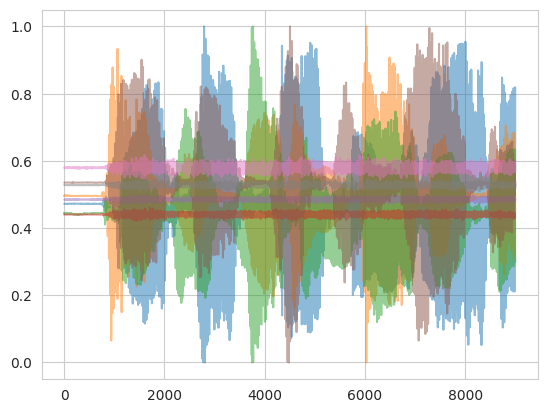

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T, alpha= 0.5)
plt.show() #centroidi degli 8 clusters

In [ ]:
for i in range(8):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1
Cluster 1: 1
Cluster 2: 1
Cluster 3: 421
Cluster 4: 763
Cluster 5: 1
Cluster 6: 150
Cluster 7: 490


In [ ]:
for i in range(8):
    print('Cluster',i,'\n\n',y_train[km.labels_ == i]['emotion'].value_counts(normalize=True),'\n\n')

Cluster 0 

 neutral    1.0
Name: emotion, dtype: float64 


Cluster 1 

 angry    1.0
Name: emotion, dtype: float64 


Cluster 2 

 fearful    1.0
Name: emotion, dtype: float64 


Cluster 3 

 angry        0.178147
calm         0.161520
happy        0.149644
sad          0.137767
fearful      0.135392
surprised    0.102138
neutral      0.087886
disgust      0.047506
Name: emotion, dtype: float64 


Cluster 4 

 angry        0.191350
happy        0.170380
fearful      0.155963
sad          0.133683
calm         0.110092
disgust      0.087811
neutral      0.081258
surprised    0.069463
Name: emotion, dtype: float64 


Cluster 5 

 angry    1.0
Name: emotion, dtype: float64 


Cluster 6 

 calm         0.333333
sad          0.186667
fearful      0.140000
disgust      0.100000
surprised    0.100000
happy        0.073333
neutral      0.040000
angry        0.026667
Name: emotion, dtype: float64 


Cluster 7 

 sad          0.187755
fearful      0.167347
calm         0.159184
happy        0.

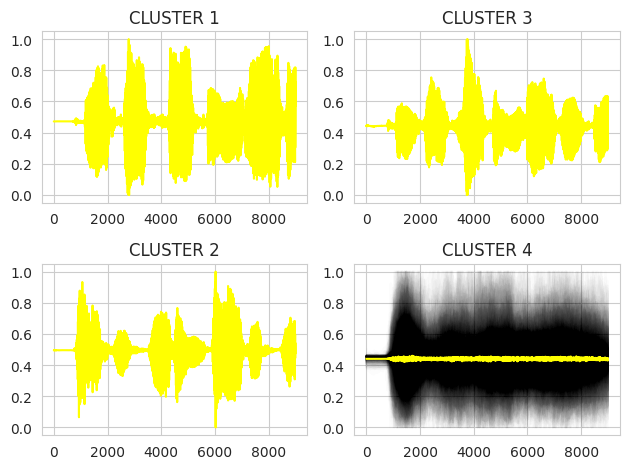

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(X_train[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(X_train[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(X_train[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(X_train[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

"""plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 5')
ax[0, 0].plot(np.squeeze(X_paa[km.labels_ == 4]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[4]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 6')
ax[1, 0].plot(np.squeeze(X_paa[km.labels_ == 5]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[5]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 7')
ax[0, 1].plot(np.squeeze(X_paa[km.labels_ == 6]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[6]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 8')
ax[1, 1].plot(np.squeeze(X_paa[km.labels_ == 7]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[7]).T, color='yellow')
#plt.ylim(-0.3,0.3)"""

fig.tight_layout()
plt.show()

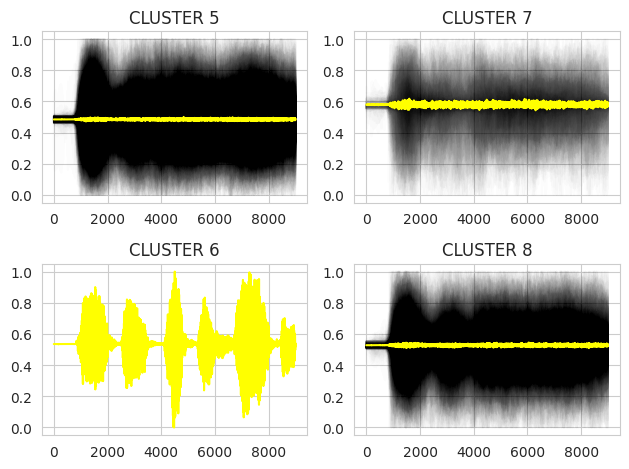

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 5')
ax[0, 0].plot(np.squeeze(X_train[km.labels_ == 4]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[4]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 6')
ax[1, 0].plot(np.squeeze(X_train[km.labels_ == 5]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[5]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 7')
ax[0, 1].plot(np.squeeze(X_train[km.labels_ == 6]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[6]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 8')
ax[1, 1].plot(np.squeeze(X_train[km.labels_ == 7]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[7]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

K-MEANS CON PAA

In [ ]:
n_paa_segments = 100
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


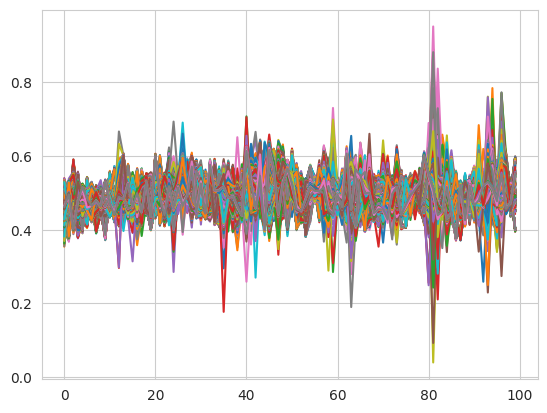

In [ ]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters=8, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(max_iter=5, n_clusters=8, random_state=0)

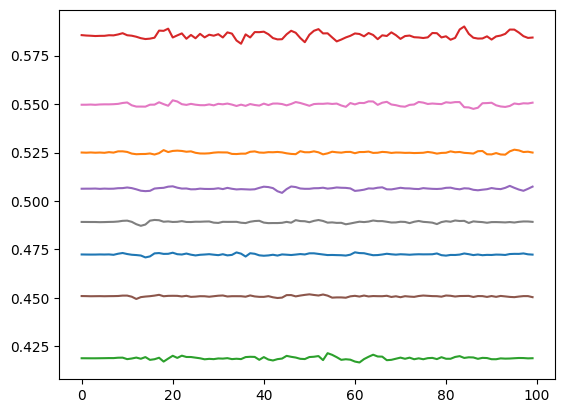

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
for i in range(8):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 314
Cluster 1: 250
Cluster 2: 118
Cluster 3: 97
Cluster 4: 284
Cluster 5: 295
Cluster 6: 164
Cluster 7: 306


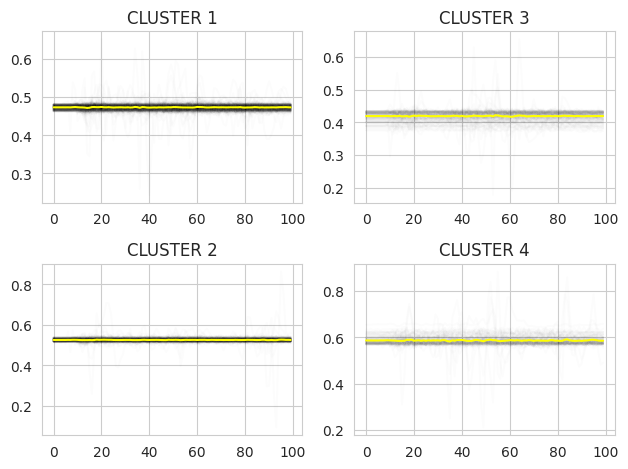

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(X_paa[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(X_paa[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(X_paa[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(X_paa[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

"""plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 5')
ax[0, 0].plot(np.squeeze(X_paa[km.labels_ == 4]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[4]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 6')
ax[1, 0].plot(np.squeeze(X_paa[km.labels_ == 5]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[5]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 7')
ax[0, 1].plot(np.squeeze(X_paa[km.labels_ == 6]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[6]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 8')
ax[1, 1].plot(np.squeeze(X_paa[km.labels_ == 7]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[7]).T, color='yellow')
#plt.ylim(-0.3,0.3)"""

fig.tight_layout()
plt.show()

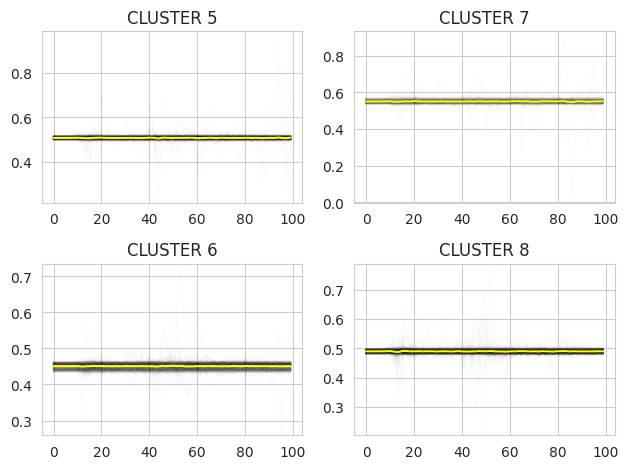

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(2, 2)
plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 5')
ax[0, 0].plot(np.squeeze(X_paa[km.labels_ == 4]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[4]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 6')
ax[1, 0].plot(np.squeeze(X_paa[km.labels_ == 5]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[5]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 7')
ax[0, 1].plot(np.squeeze(X_paa[km.labels_ == 6]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[6]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 8')
ax[1, 1].plot(np.squeeze(X_paa[km.labels_ == 7]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[7]).T, color='yellow')
#plt.ylim(-0.3,0.3)"""

fig.tight_layout()
plt.show()

In [ ]:
for i in range(8):
    print('Cluster',i,'\n\n',y_train[km.labels_ == i]['emotion'].value_counts(normalize=True),'\n\n')

Cluster 0 

 angry        0.171975
happy        0.162420
fearful      0.152866
sad          0.140127
calm         0.121019
neutral      0.098726
disgust      0.076433
surprised    0.076433
Name: emotion, dtype: float64 


Cluster 1 

 sad          0.204
fearful      0.180
angry        0.152
calm         0.140
happy        0.140
disgust      0.096
neutral      0.052
surprised    0.036
Name: emotion, dtype: float64 


Cluster 2 

 calm         0.194915
fearful      0.194915
angry        0.186441
happy        0.144068
sad          0.110169
surprised    0.084746
neutral      0.076271
disgust      0.008475
Name: emotion, dtype: float64 


Cluster 3 

 calm         0.371134
sad          0.175258
fearful      0.123711
disgust      0.103093
surprised    0.103093
happy        0.051546
neutral      0.041237
angry        0.030928
Name: emotion, dtype: float64 


Cluster 4 

 happy        0.197183
fearful      0.179577
angry        0.137324
sad          0.123239
calm         0.109155
disgust      

K-MEANS CON SAX

In [ ]:
n_sax_symbols = 100
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, 
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(X_train)
sax_dataset_inv = sax.inverse_transform(ts_sax)

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


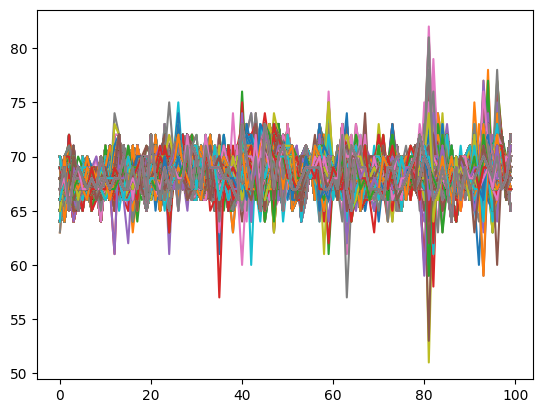

In [ ]:
plt.plot(ts_sax.reshape(ts_sax.shape[1], X_paa.shape[0]))
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters= 8, metric="euclidean", max_iter=5, random_state=0)
km.fit(ts_sax)

TimeSeriesKMeans(max_iter=5, n_clusters=8, random_state=0)

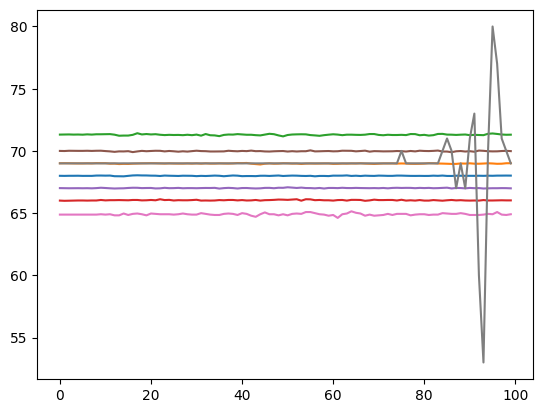

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
speech_idx = list(y_train[y_train['vocal_channel'] == 'speech'].index)
speech_idx_test = list(y_test[y_test['vocal_channel'] == 'speech'].index)
X_train.loc[speech_idx]

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.478953,0.478930,0.478963,0.479000,0.479033,0.478917,0.478962,0.479076,0.478986,0.479044,...,0.478964,0.478972,0.478954,0.479004,0.479027,0.478991,0.478989,0.478963,0.478963,0.478972
1,0.487595,0.487634,0.487452,0.487303,0.487453,0.487511,0.487419,0.487419,0.487455,0.487497,...,0.487636,0.487621,0.487634,0.487625,0.487627,0.487639,0.487655,0.487680,0.487670,0.487687
2,0.427850,0.427861,0.427855,0.427868,0.427906,0.427792,0.428041,0.428184,0.427788,0.427903,...,0.427856,0.427857,0.427860,0.427847,0.427886,0.427911,0.427853,0.427855,0.427861,0.427853
3,0.396596,0.396596,0.396596,0.396596,0.396596,0.396596,0.396596,0.396596,0.396596,0.396596,...,0.396614,0.396620,0.396589,0.396599,0.396593,0.396596,0.396626,0.396602,0.396591,0.396599
4,0.511042,0.511033,0.511039,0.511129,0.511183,0.511080,0.511143,0.511106,0.511012,0.511047,...,0.511319,0.511196,0.511307,0.511688,0.512238,0.511792,0.511950,0.511555,0.511141,0.511186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0.494601,0.494644,0.494542,0.494724,0.494777,0.494786,0.494951,0.494931,0.495068,0.495079,...,0.494605,0.494436,0.494472,0.494530,0.495231,0.496948,0.496705,0.494615,0.494441,0.494834
1824,0.506856,0.506856,0.506855,0.506856,0.506855,0.506856,0.506855,0.506855,0.506856,0.506855,...,0.506371,0.506207,0.506324,0.506574,0.507017,0.507052,0.506807,0.507000,0.506998,0.506789
1825,0.468175,0.468167,0.468189,0.468188,0.468186,0.468189,0.468186,0.468188,0.468187,0.468187,...,0.468074,0.468971,0.468944,0.467587,0.467069,0.467501,0.467229,0.468269,0.469599,0.468780
1826,0.475698,0.475698,0.475698,0.475698,0.475698,0.475698,0.475698,0.475698,0.475698,0.475698,...,0.411781,0.344276,0.396192,0.357398,0.400889,0.541947,0.520326,0.521368,0.607204,0.565718


In [ ]:
speech_idx = list(y_train[y_train['vocal_channel'] == 'speech'].index)
speech_idx_test = list(y_test[y_test['vocal_channel'] == 'speech'].index)
X_train_speech = X_train.loc[speech_idx]
X_test_speech = X_test.loc[speech_idx_test]

In [ ]:
for i in range(8):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 503
Cluster 1: 430
Cluster 2: 154
Cluster 3: 120
Cluster 4: 343
Cluster 5: 243
Cluster 6: 34
Cluster 7: 1


In [ ]:
for i in range(8):
    print('Cluster',i,'\n\n',y_train[km.labels_ == i]['emotion'].value_counts(normalize=True),'\n\n')

Cluster 0 

 angry        0.188867
happy        0.178926
fearful      0.139165
sad          0.135189
calm         0.113320
disgust      0.085487
neutral      0.083499
surprised    0.075547
Name: emotion, dtype: float64 


Cluster 1 

 fearful      0.186047
happy        0.176744
angry        0.160465
sad          0.151163
calm         0.104651
disgust      0.079070
neutral      0.072093
surprised    0.069767
Name: emotion, dtype: float64 


Cluster 2 

 calm         0.331169
sad          0.194805
fearful      0.142857
disgust      0.097403
surprised    0.097403
happy        0.071429
neutral      0.038961
angry        0.025974
Name: emotion, dtype: float64 


Cluster 3 

 fearful      0.191667
happy        0.175000
calm         0.158333
angry        0.150000
surprised    0.108333
sad          0.108333
neutral      0.091667
disgust      0.016667
Name: emotion, dtype: float64 


Cluster 4 

 angry        0.183673
sad          0.154519
calm         0.151603
happy        0.134111
fearful    

HIERARCHICAL CLUSTERING

X TRAIN NON APPROSSIMATO

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z1 = linkage(X_train, method='single', metric='euclidean')
Z2 = linkage(X_train, method='complete', metric='euclidean')
Z3 = linkage(X_train, method='ward', metric='euclidean')

<ipython-input-71-a35f6a7548e0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


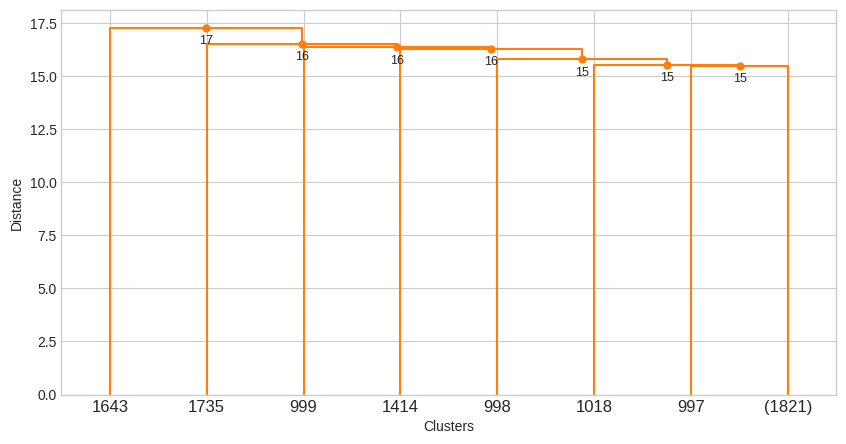

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
plt.xlabel('Clusters')
plt.ylabel('Distance')
ddata = dendrogram(Z1, color_threshold=113, orientation='top',
           truncate_mode='lastp',  # show only the last p merged clusters
           p=8,  # show only the last p merged clusters)
          )
# plot cluster points & distance labels
limit = 4
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > limit:
        plt.plot(x, y, 'o', c=c, markeredgewidth=0)
        plt.annotate(int(y), (x, y), xytext=(0, -5),
                    textcoords='offset points',
                    va='top', ha='center', fontsize=9)

<ipython-input-66-a8ff35c18ff4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


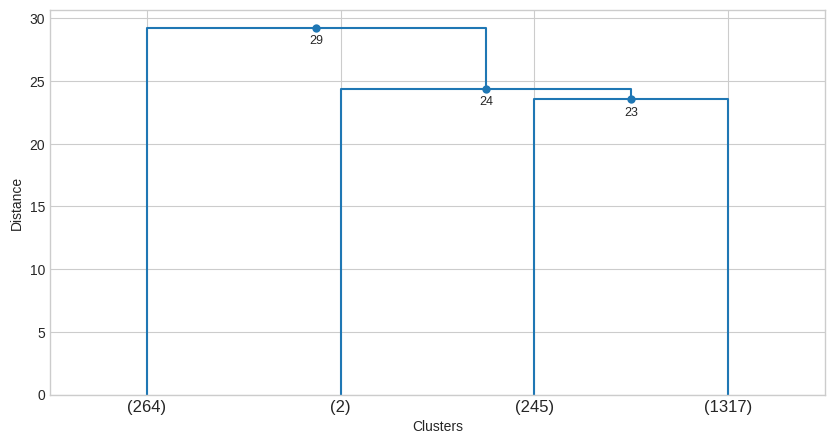

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
plt.xlabel('Clusters')
plt.ylabel('Distance')
ddata = dendrogram(Z2, color_threshold=5, orientation='top',
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters)
          )
# plot cluster points & distance labels
limit = 4
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > limit:
        plt.plot(x, y, 'o', c=c, markeredgewidth=0)
        plt.annotate(int(y), (x, y), xytext=(0, -5),
                    textcoords='offset points',
                    va='top', ha='center', fontsize=9)

<ipython-input-84-39eafa3c07b4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


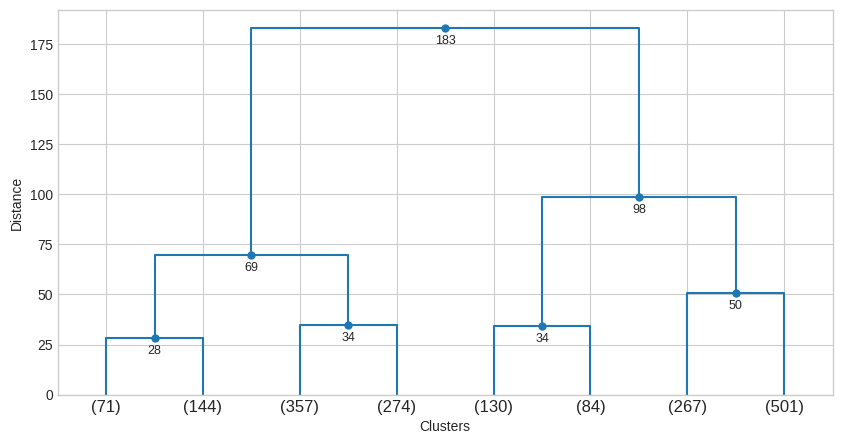

In [ ]:
Z3 = linkage(X_train, method='ward', metric='euclidean')

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
plt.xlabel('Clusters')
plt.ylabel('Distance')
ddata = dendrogram(Z3, color_threshold=10, orientation='top',
           truncate_mode='lastp',  # show only the last p merged clusters
           p=8,  # show only the last p merged clusters)
          )
# plot cluster points & distance labels
limit = 8
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > limit:
        plt.plot(x, y, 'o', c=c, markeredgewidth=0)
        plt.annotate(int(y), (x, y), xytext=(0, -5),
                    textcoords='offset points',
                    va='top', ha='center', fontsize=9)